##### Import Dataset from UCI

In [6]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 
  
# metadata 
print(heart_disease.metadata) 
  
# variable information 
print(heart_disease.variables) 


{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M. Pfisterer, J. Schmid, S. Sa

##### Import Libraries and Dataset

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv(url, names=columns)

##### Dataset Desription

In [19]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [21]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


In [23]:
# Replace '?' with NaN for better handling of missing values
data = data.replace('?', np.nan)

In [25]:
# Convert columns with missing values to numeric
data['ca'] = pd.to_numeric(data['ca'])
data['thal'] = pd.to_numeric(data['thal'])

In [27]:
# After conversion, check for missing values again
print("\nMissing Values after conversion:")
print(data.isnull().sum())


Missing Values after conversion:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [29]:
# Filling missing values with the median of the column
data['ca'].fillna(data['ca'].median(), inplace=True)
data['thal'].fillna(data['thal'].median(), inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_30096\4124075817.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['ca'].fillna(data['ca'].median(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_30096\4124075817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [31]:
# Check for missing values after imputation
print("\nMissing Values after imputation:")
print(data.isnull().sum())


Missing Values after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [33]:
# Data distribution
print("\nData Distribution:")
print(data['target'].value_counts())


Data Distribution:
target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64


##### Exploratory Data Analysis(EDA)

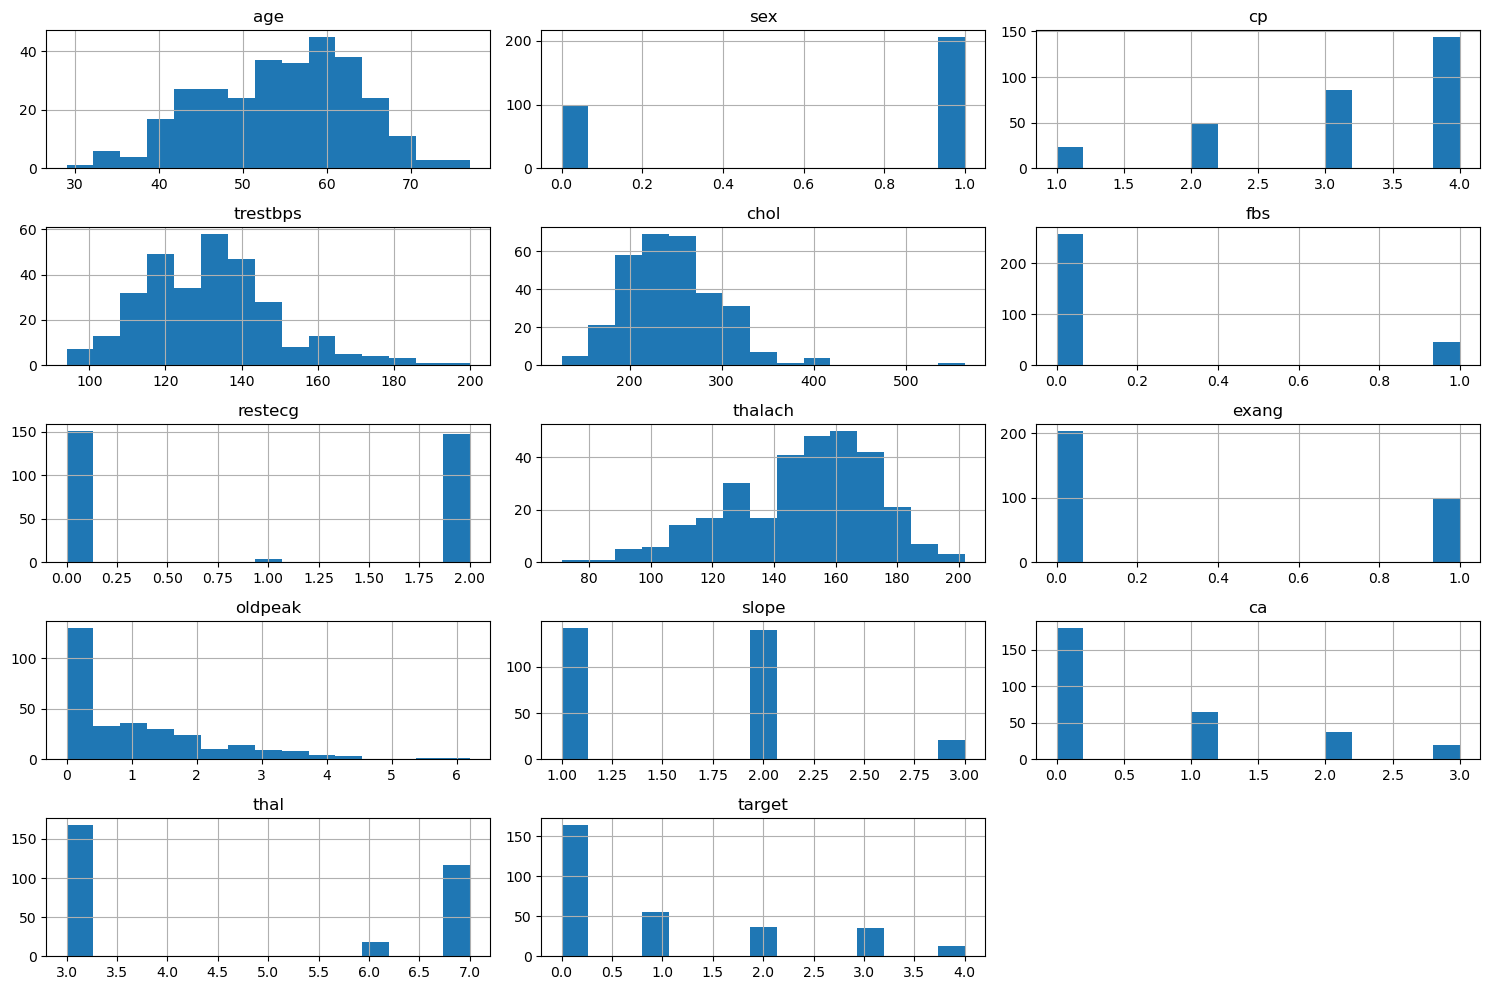

In [36]:
# Plotting histograms for numerical columns
data.hist(bins=15, figsize=(15, 10), layout=(5, 3))
plt.tight_layout()
plt.show()

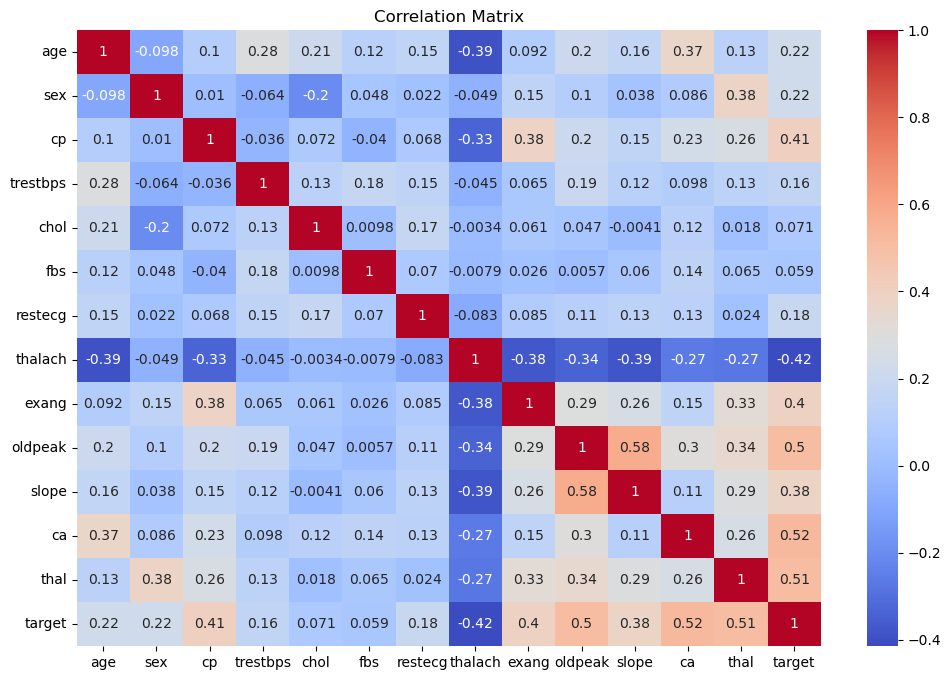

In [37]:
# Plotting correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

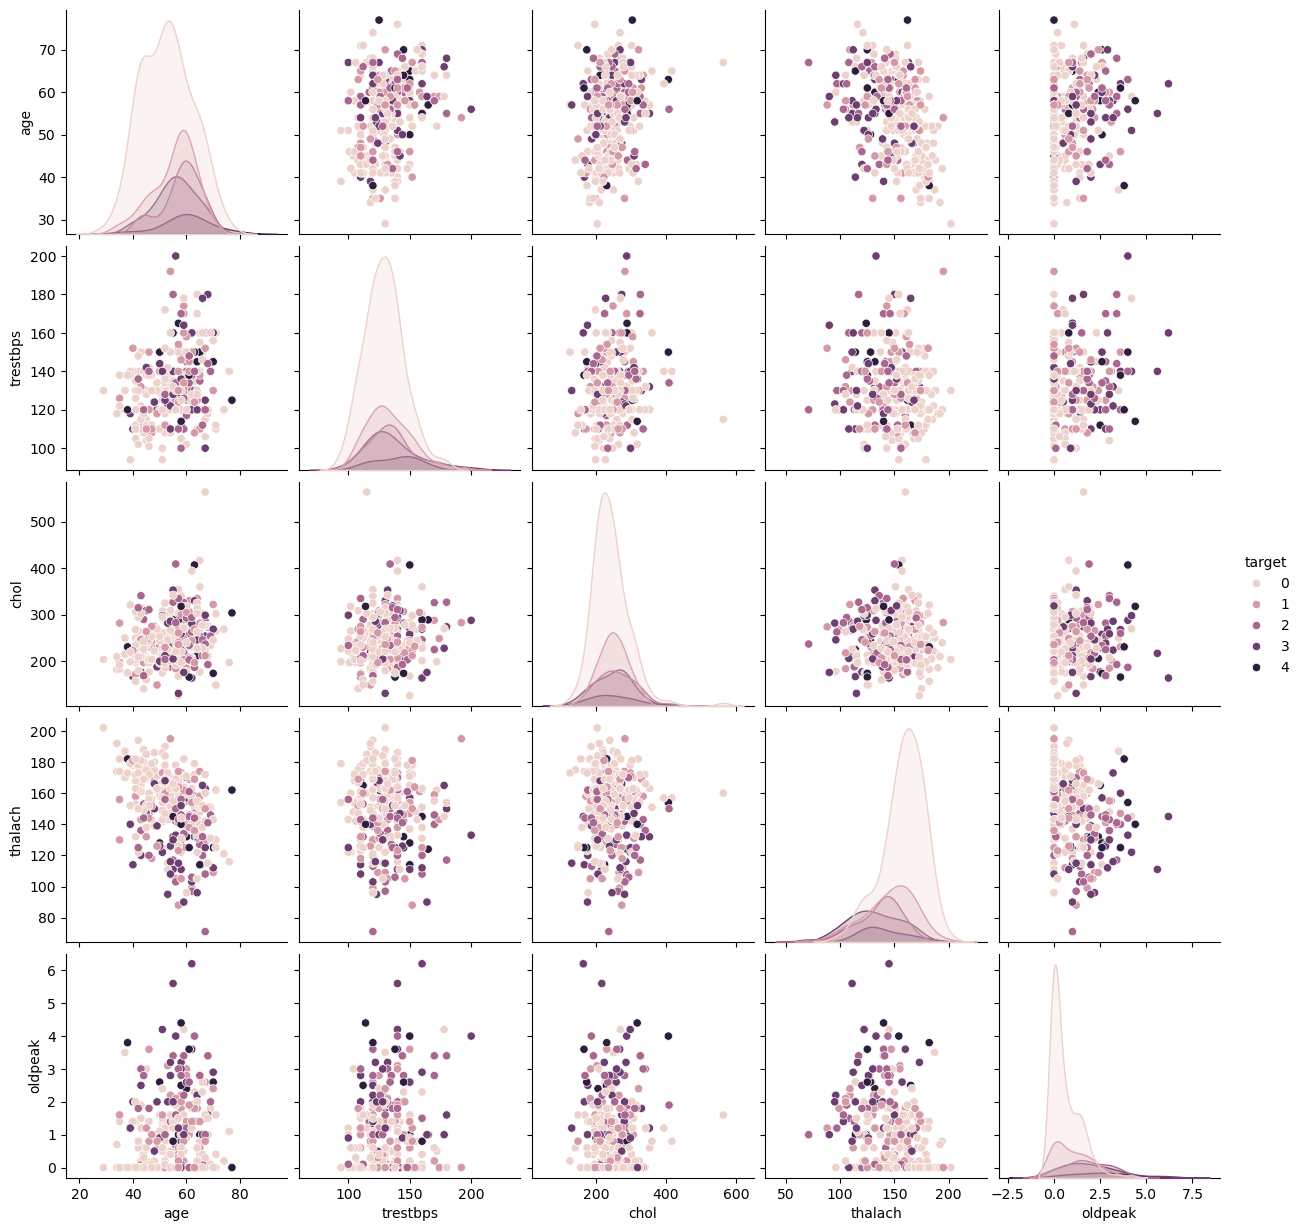

In [40]:
# Plotting pairplot for a subset of features
sns.pairplot(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue='target')
plt.show()

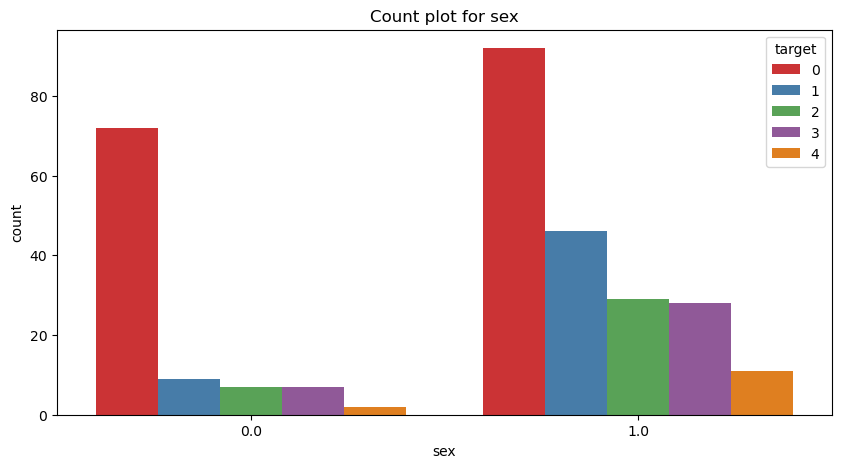

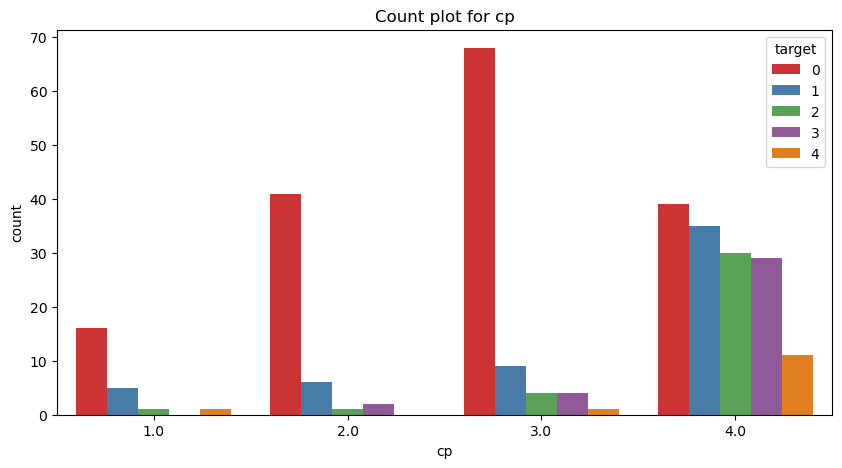

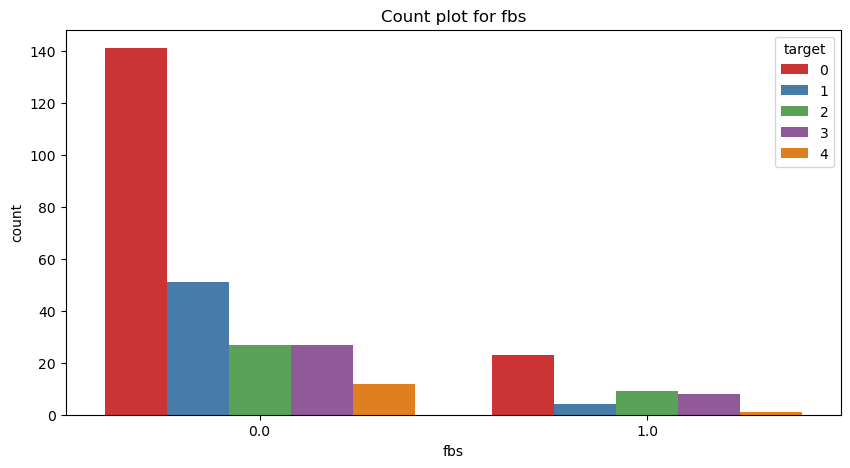

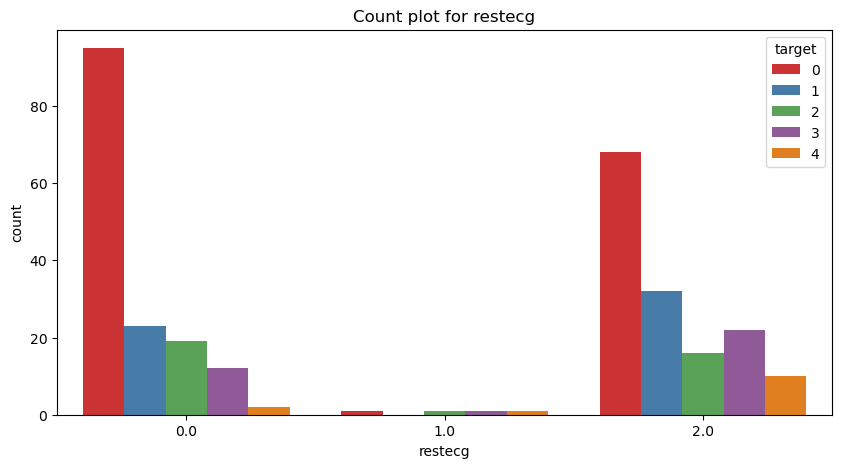

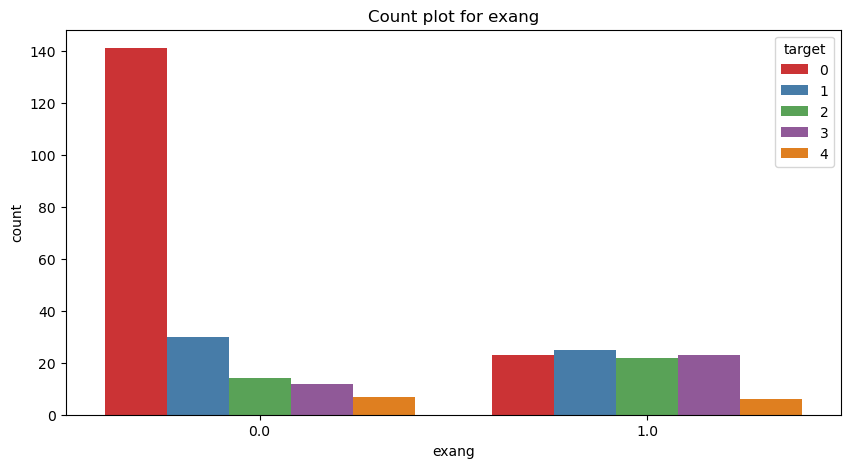

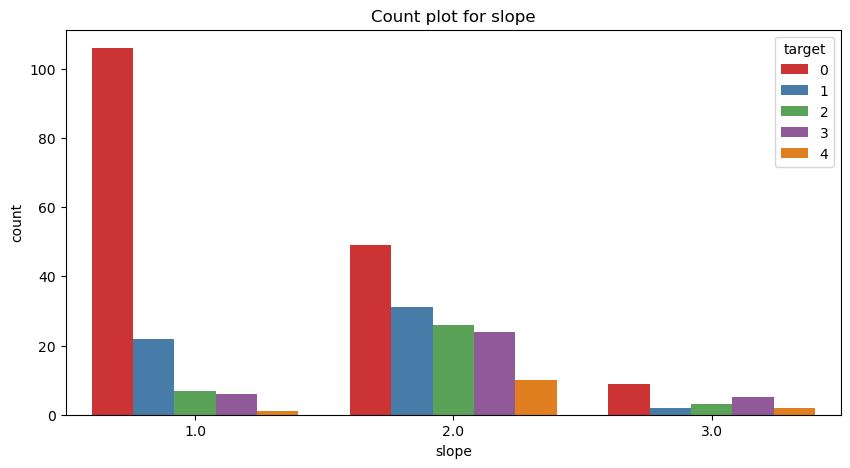

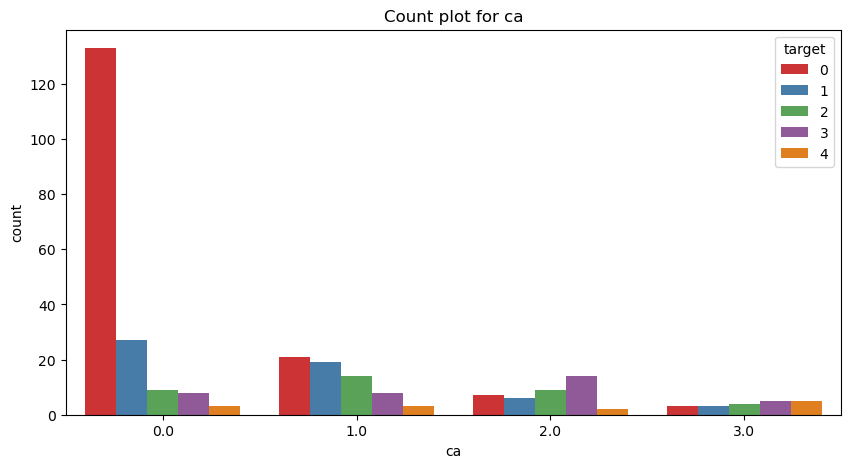

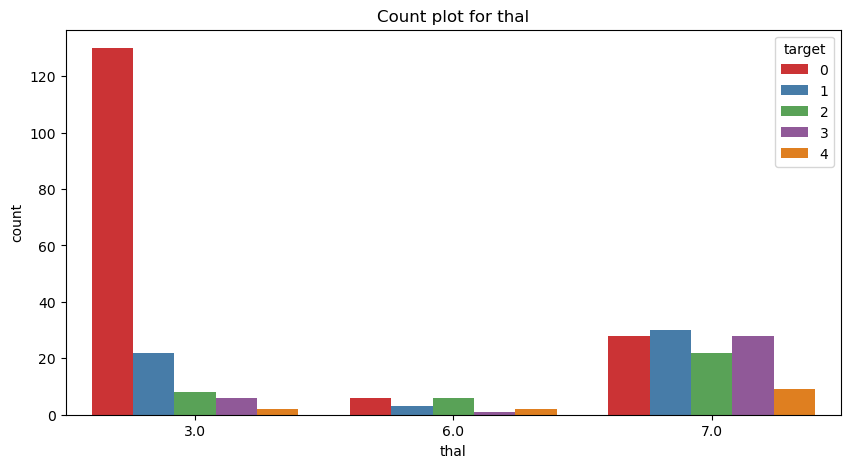

In [41]:
# Plotting count plots for categorical features
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='target', data=data, palette='Set1')
    plt.title(f'Count plot for {feature}')
    plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_30096\154875584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='Set1')


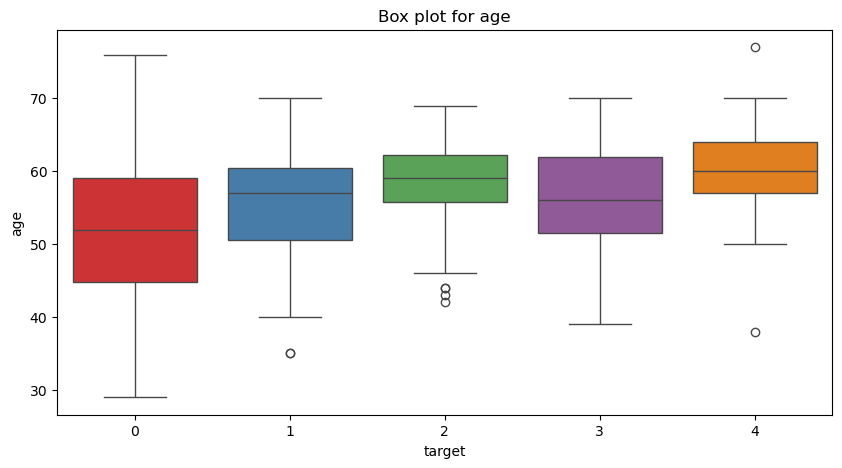

C:\Users\pc\AppData\Local\Temp\ipykernel_30096\154875584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='Set1')


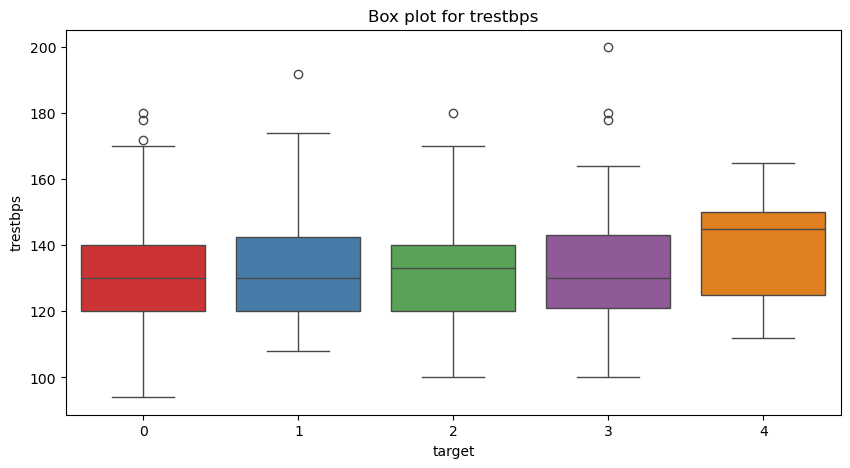

C:\Users\pc\AppData\Local\Temp\ipykernel_30096\154875584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='Set1')


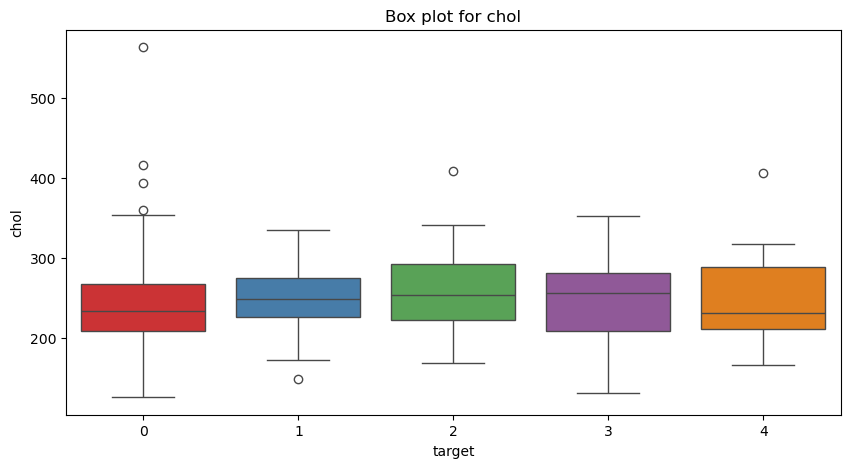

C:\Users\pc\AppData\Local\Temp\ipykernel_30096\154875584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='Set1')


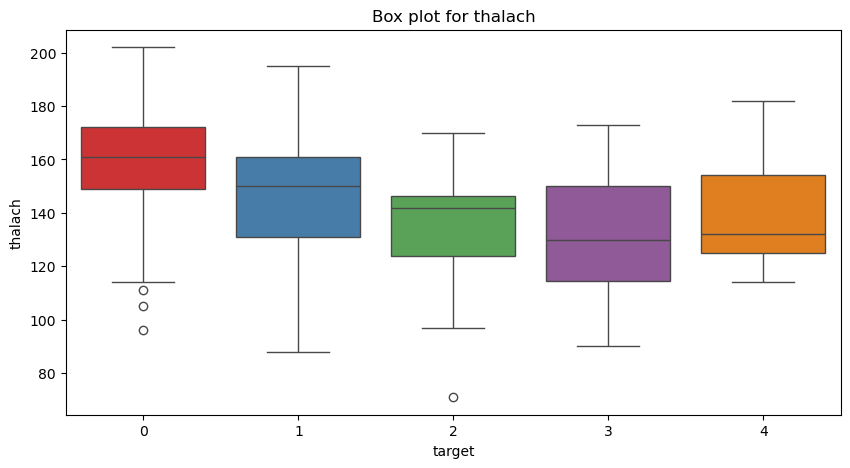

C:\Users\pc\AppData\Local\Temp\ipykernel_30096\154875584.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=data, palette='Set1')


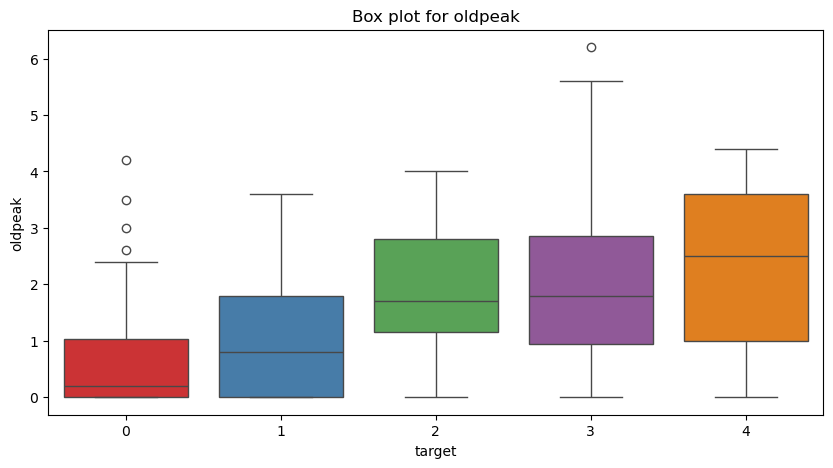

In [46]:
# Plotting boxplots for numerical features
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='target', y=feature, data=data, palette='Set1')
    plt.title(f'Box plot for {feature}')
    plt.show()

##### Data PRe-Processing

In [39]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

In [41]:
# Split the data into features and target variable
X = data.drop('target', axis=1)
y = data['target']


In [43]:
# Preprocessing for numerical data
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [45]:
# Preprocessing for categorical data
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [47]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [49]:
# Create the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [51]:
# Fit and transform the data
X_preprocessed = pipeline.fit_transform(X)


In [53]:
# Check the shape of the preprocessed data
print("Shape of preprocessed data:", X_preprocessed.shape)

Shape of preprocessed data: (303, 28)


In [55]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [57]:
# Check the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (242, 28) (242,)
Test set shape: (61, 28) (61,)


##### Model Archictecture

##### 1.RNN-LSTM

In [59]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [71]:
## Since our data is not sequential, we can reshape it to (samples, features, 1)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [73]:
# Build LSTM model
model_lstm = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history_lstm = model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test))

# Evaluate the model
loss, accuracy = model_lstm.evaluate(X_test_lstm, y_test)
print(f'RNN Model - Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.2680 - loss: 0.6961 - val_accuracy: 0.2459 - val_loss: 0.6146
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2027 - loss: 0.6304 - val_accuracy: 0.2131 - val_loss: 0.5305
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1897 - loss: 0.5432 - val_accuracy: 0.2131 - val_loss: 0.4426
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2060 - loss: 0.4914 - val_accuracy: 0.2295 - val_loss: 0.3496
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2599 - loss: 0.4203 - val_accuracy: 0.2623 - val_loss: 0.2379
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2641 - loss: 0.3206 - val_accuracy: 0.3115 - val_loss: 0.0985
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2838 - loss: 0.1542 - val_accuracy: 0.3607 - val_loss: -0.0669
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3367 - loss: 0.0760 - val_accuracy: 0.3770 - val_loss: -0.2570
Epoch 9/50
8/8 ━

##### 2.CNN

In [75]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, MaxPooling1D
from sklearn.model_selection import train_test_split


In [77]:
## Since our data is not sequential, we can reshape it to (samples, features, 1)
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [79]:
# Build CNN model
model_cnn = Sequential([
    Conv1D(32, 2, activation='relu', input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history_cnn = model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
loss, accuracy = model_cnn.evaluate(X_test_cnn, y_test)
print(f'CNN Model - Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/50


C:\Users\pc\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.2904 - loss: 0.6190 - val_accuracy: 0.1967 - val_loss: 0.0845
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1844 - loss: 0.2259 - val_accuracy: 0.1967 - val_loss: -0.3025
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1544 - loss: -0.0698 - val_accuracy: 0.1967 - val_loss: -0.6754
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1907 - loss: -0.3765 - val_accuracy: 0.1967 - val_loss: -1.0772
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2186 - loss: -0.6125 - val_accuracy: 0.2295 - val_loss: -1.5782
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2313 - loss: -1.3335 - val_accuracy: 0.3115 - val_loss: -2.1760
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3083 - loss: -1.2988 - val_accuracy: 0.3934 - val_loss: -2.7774
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3524 - loss: -2.6363 - val_accuracy: 0.3607 - val_loss: -3.7924
Epoch

##### Model Evaluation

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()


In [101]:
# Evaluate LSTM model
y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()
y_pred_lstm_class = (y_pred_lstm > 0.5).astype(int)
print("LSTM Model Classification Report:")
print(classification_report(y_test, y_pred_lstm_class))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
LSTM Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.62      0.73        29
           1       0.24      0.83      0.38        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.46        61
   macro avg       0.23      0.29      0.22        61
weighted avg       0.48      0.46      0.42        61



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


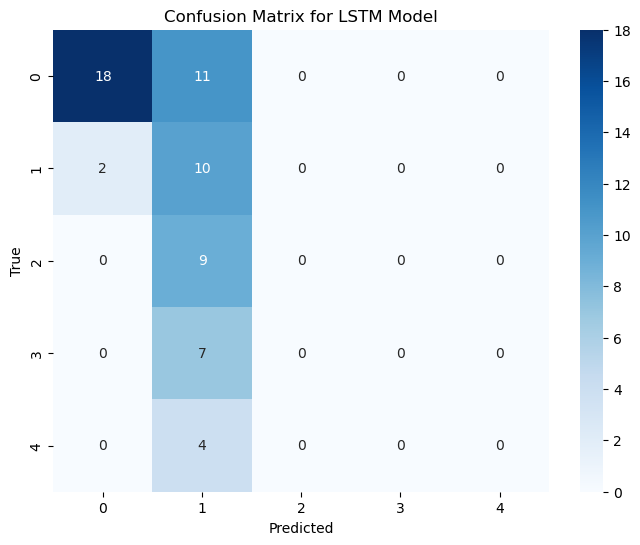

In [103]:
# Plot confusion matrix for LSTM
plot_confusion_matrix(y_test, y_pred_lstm_class, "Confusion Matrix for LSTM Model")

In [105]:
# Evaluate CNN model
y_pred_cnn = model_cnn.predict(X_test_cnn).flatten()
y_pred_cnn_class = (y_pred_cnn > 0.5).astype(int)
print("CNN Model Classification Report:")
print(classification_report(y_test, y_pred_cnn_class))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
CNN Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        29
           1       0.24      1.00      0.39        12
           2       0.00      0.00      0.00         9
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4

    accuracy                           0.38        61
   macro avg       0.25      0.28      0.19        61
weighted avg       0.52      0.38      0.34        61



C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


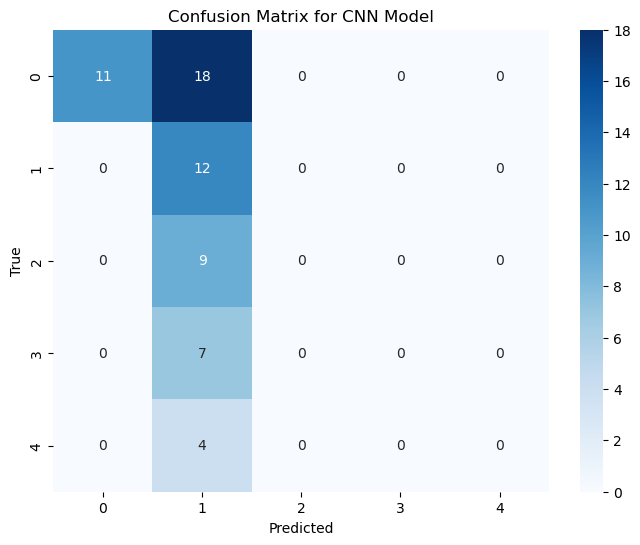

In [107]:

# Plot confusion matrix for CNN
plot_confusion_matrix(y_test, y_pred_cnn_class, "Confusion Matrix for CNN Model")

##### Generating PRedictions

In [109]:
# Generate predictions with LSTM model
y_pred_lstm_prob = model_lstm.predict(X_test_lstm).flatten()
y_pred_lstm_class = (y_pred_lstm_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [111]:
# Generate predictions with CNN model
y_pred_cnn_prob = model_cnn.predict(X_test_cnn).flatten()
y_pred_cnn_class = (y_pred_cnn_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


##### Results of RNN-LSTM and CNN saved to two files 

In [113]:
# Save predictions to CSV files
np.savetxt("lstm_predictions.csv", np.column_stack((y_test, y_pred_lstm_class, y_pred_lstm_prob)), delimiter=",", header="Actual,Predicted,Probability", comments='')
np.savetxt("cnn_predictions.csv", np.column_stack((y_test, y_pred_cnn_class, y_pred_cnn_prob)), delimiter=",", header="Actual,Predicted,Probability", comments='')

In [115]:
print("Predictions saved to lstm_predictions.csv and cnn_predictions.csv")

Predictions saved to lstm_predictions.csv and cnn_predictions.csv


In [117]:
df=pd.read_csv("lstm_predictions.csv")

In [129]:
df.head(10)

,Actual,Predicted,Probability
0,0.0,0.0,0.000211
1,3.0,1.0,1.000000
2,1.0,1.0,1.000000
3,2.0,1.0,1.000000
4,2.0,1.0,1.000000
5,1.0,1.0,1.000000
6,2.0,1.0,1.000000
7,3.0,1.0,1.000000
8,1.0,1.0,0.640847
9,0.0,1.0,1.000000


In [121]:
df1=pd.read_csv("cnn_predictions.csv")

In [125]:
df1.head(20)

,Actual,Predicted,Probability
0,0.0,1.0,1.000000
1,3.0,1.0,1.000000
2,1.0,1.0,1.000000
3,2.0,1.0,1.000000
4,2.0,1.0,1.000000
5,1.0,1.0,1.000000
6,2.0,1.0,1.000000
7,3.0,1.0,1.000000
8,1.0,1.0,1.000000
9,0.0,1.0,1.000000
